In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns


In [109]:
breast_cancer = load_breast_cancer()

In [110]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [111]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [112]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean perimeter', 'worst area', 'worst radius']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y)

y.drop(['benign'], axis=1, inplace=True)

In [113]:
y.head()

,malignant
0,1
1,1
2,1
3,1
4,1


In [114]:
# Proportion of records labeled as malignant

y['malignant'].mean()

0.37258347978910367

In [115]:
# Create a dataframe from X & y for exploratory analysis

bc_data = pd.concat([X,y], axis=1)

In [116]:
bc_data.head()

,mean area,mean perimeter,worst area,worst radius,malignant
0,1001.0,122.80,2019.0,25.38,1
1,1326.0,132.90,1956.0,24.99,1
2,1203.0,130.00,1709.0,23.57,1
3,386.1,77.58,567.7,14.91,1
4,1297.0,135.10,1575.0,22.54,1


In [117]:
bc_data.describe()

,mean area,mean perimeter,worst area,worst radius,malignant
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,654.889104,91.969033,880.583128,16.269190,0.372583
std,351.914129,24.298981,569.356993,4.833242,0.483918
min,143.500000,43.790000,185.200000,7.930000,0.000000
25%,420.300000,75.170000,515.300000,13.010000,0.000000
50%,551.100000,86.240000,686.500000,14.970000,0.000000
75%,782.700000,104.100000,1084.000000,18.790000,1.000000
max,2501.000000,188.500000,4254.000000,36.040000,1.000000


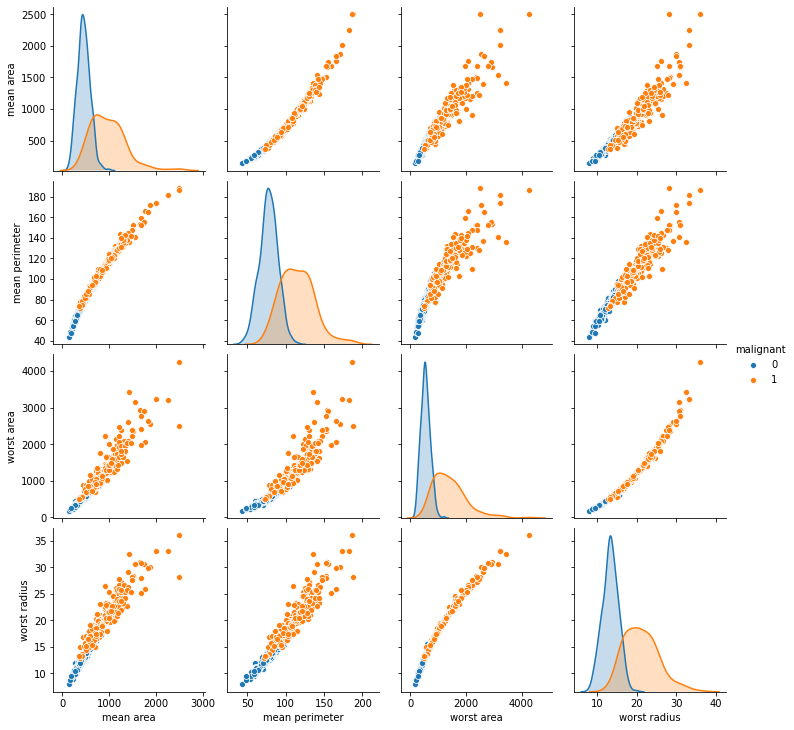

In [118]:

sns.pairplot(bc_data, hue='malignant')

In [119]:
# MinMax Scaler transforms features into [0,1]
# Formula: X_rescaled = (Xi - Xmin) / (Xmax-Xmin)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [120]:
X_rescaled.describe()

,mean area,mean perimeter,worst area,worst radius
count,569.000000,569.000000,569.000000,569.000000
mean,0.216920,0.332935,0.170906,0.296663
std,0.149274,0.167915,0.139932,0.171940
min,0.000000,0.000000,0.000000,0.000000
25%,0.117413,0.216847,0.081130,0.180719
50%,0.172895,0.293345,0.123206,0.250445
75%,0.271135,0.416765,0.220901,0.386339
max,1.000000,1.000000,1.000000,1.000000


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [122]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[104   4]
 [  9  54]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       108
           1       0.93      0.86      0.89        63

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [123]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.9100529100529102


In [124]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())


In [125]:
cv_scores[:4]

[0.9347151898734178,
 0.9271518987341771,
 0.9273101265822785,
 0.9171518987341774]

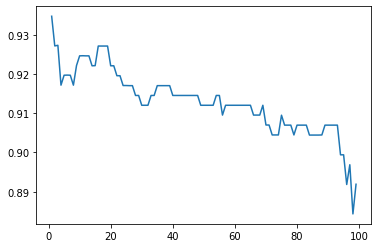

In [126]:
sns.lineplot(x=range(1,max_K), y=cv_scores)